<a href="https://colab.research.google.com/github/dharmendra-chouhan/s2datascience/blob/master/Extracted_Construction_Worker_Patient_Details_Files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.  District wise 
          Gender wise Registration
          Health status wise Registration
          District wise Registration
          District wise Camp

2. 
District wise Registration Count
3.   District wise maximum Registration 
4.   District wise minimum Registration 
5.   District and Gender wise data 
6.   Gender wise Worker Patient
7.   Age wise Registration Count
8.  District and health status wise data



In [0]:
import pandas as pd

# **Extracted Construction Worker Patient Details Files**
Construcution Worker's Health Data Analysis
---




**Read a csv file from a Google drive**

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'1G9LdZeCed2psskC9MLuORz3tA9mkN_-M'}) # replace the id with id of file you want to access
downloaded.GetContentFile('ExtractedConstructionWorkerPatient.csv')  

#3. Read file as panda dataframe
import pandas as pd
df1 = pd.read_csv('ExtractedConstructionWorkerPatient.csv') 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Columns of the Extracted Construction Worker Patient Details Files:**

In [3]:
print(df1.columns)

Index(['campid', 'campno', 'camplocation', 'campdate', 'distlgdcode',
       'distname', 'regdid', 'regdno', 'regdno_audio', 'fullname',
       'fullname_audio', 'mobile', 'mobile_audio', 'age', 'age_audio',
       'gender', 'gender_audio', 'docremark', 'health_status', 'bmi',
       'weight_kgs', 'height_cms', 'bloodsugar_f', 'bloodsugar_pp',
       'bloodsugar_r', 'pulserate', 'testid', 'testname', 'right_remark',
       'left_remark', 'testname_lft', 'fev1', 'fevi_fvc', 'pef', 'fef_25_75',
       'fivc', 'pif', 'fet', 'result', 'diseaseid', 'diseasename',
       'disease_status', 'campdate_ph', 'distlgdcode_ph', 'isalcohol',
       'issmoking', 'istobaco', 'isdrug', 'phy_exam_testid',
       'phy_exam_testname', 'phy_exam_remark', 'testid_vi', 'testname_vi',
       'diesease_injury_evidence_right_vi', 'diesease_injury_evidence_left_vi',
       'other_remark_vi', 'suggestion_vi', 'finalremark_vi',
       'wearingglasses_vi', 'leftremark_vi', 'rightremark_vi',
       'nearvisionremark

**Description of Dataset**

   . This Data set contains total 62 Columns and total 632947 Construction Worker Patient Details (row)


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632948 entries, 0 to 632947
Data columns (total 62 columns):
campid                               632948 non-null int64
campno                               632938 non-null object
camplocation                         632938 non-null object
campdate                             632948 non-null object
distlgdcode                          632948 non-null int64
distname                             632948 non-null object
regdid                               632948 non-null int64
regdno                               632948 non-null int64
regdno_audio                         632948 non-null int64
fullname                             632946 non-null object
fullname_audio                       632946 non-null object
mobile                               527212 non-null float64
mobile_audio                         527212 non-null float64
age                                  632946 non-null float64
age_audio                            632946 non-nul

**Print first five Record from datafram**

In [5]:
df1.head(5)

,campid,campno,camplocation,campdate,distlgdcode,distname,regdid,regdno,regdno_audio,fullname,fullname_audio,mobile,mobile_audio,age,age_audio,gender,gender_audio,docremark,health_status,bmi,weight_kgs,height_cms,bloodsugar_f,bloodsugar_pp,bloodsugar_r,pulserate,testid,testname,right_remark,left_remark,testname_lft,fev1,fevi_fvc,pef,fef_25_75,fivc,pif,fet,result,diseaseid,diseasename,disease_status,campdate_ph,distlgdcode_ph,isalcohol,issmoking,istobaco,isdrug,phy_exam_testid,phy_exam_testname,phy_exam_remark,testid_vi,testname_vi,diesease_injury_evidence_right_vi,diesease_injury_evidence_left_vi,other_remark_vi,suggestion_vi,finalremark_vi,wearingglasses_vi,leftremark_vi,rightremark_vi,nearvisionremark_vi
0,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497742,131380003406,131380003406,Manisha Suhas Nikam,Manisha Suhas Nikam,9.967911e+09,9.967911e+09,35.0,35.0,F,F,patient is normal,Normal,22.3674,51.0,151.0,117.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,2.552,0.852,3.285,2034.013,2.557,3.364,0.027,NORMAL,7.0,Tuberculosis,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,No,Normal Vision,Normal Vision,Normal Vision
1,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497742,131380003406,131380003406,Manisha Suhas Nikam,Manisha Suhas Nikam,9.967911e+09,9.967911e+09,35.0,35.0,F,F,patient is normal,Normal,22.3674,51.0,151.0,117.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,2.552,0.852,3.285,2034.013,2.557,3.364,0.027,NORMAL,8.0,Cardiovascular Diseasse,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,No,Normal Vision,Normal Vision,Normal Vision
2,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497742,131380003406,131380003406,Manisha Suhas Nikam,Manisha Suhas Nikam,9.967911e+09,9.967911e+09,35.0,35.0,F,F,patient is normal,Normal,22.3674,51.0,151.0,117.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,2.552,0.852,3.285,2034.013,2.557,3.364,0.027,NORMAL,9.0,Congenital Abnormality,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,No,Normal Vision,Normal Vision,Normal Vision
3,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497744,131390043378,131390043378,Amruta Sambhaji Shingate,Amruta Sambhaji Shingate,9.923967e+09,9.923967e+09,29.0,29.0,F,F,patient is normal,Normal,24.3865,64.0,162.0,120.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,3.028,0.926,25.185,2493.410,2.225,3.244,0.022,NORMAL,1.0,Asthama,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,Yes,Normal Vision,Normal Vision,Normal Vision
4,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497744,131390043378,131390043378,Amruta Sambhaji Shingate,Amruta Sambhaji Shingate,9.923967e+09,9.923967e+09,29.0,29.0,F,F,patient is normal,Normal,24.3865,64.0,162.0,120.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,3.028,0.926,25.185,2493.410,2.225,3.244,0.022,NORMAL,10.0,Gastrointestinal Ulcer,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,Yes,Normal Vision,Normal Vision,Normal Vision


**Describe all Construction Worker Patient Details data**

In [6]:
df1.describe(include='all')

,campid,campno,camplocation,campdate,distlgdcode,distname,regdid,regdno,regdno_audio,fullname,fullname_audio,mobile,mobile_audio,age,age_audio,gender,gender_audio,docremark,health_status,bmi,weight_kgs,height_cms,bloodsugar_f,bloodsugar_pp,bloodsugar_r,pulserate,testid,testname,right_remark,left_remark,testname_lft,fev1,fevi_fvc,pef,fef_25_75,fivc,pif,fet,result,diseaseid,diseasename,disease_status,campdate_ph,distlgdcode_ph,isalcohol,issmoking,istobaco,isdrug,phy_exam_testid,phy_exam_testname,phy_exam_remark,testid_vi,testname_vi,diesease_injury_evidence_right_vi,diesease_injury_evidence_left_vi,other_remark_vi,suggestion_vi,finalremark_vi,wearingglasses_vi,leftremark_vi,rightremark_vi,nearvisionremark_vi
count,632948.000000,632938,632938,632948,632948.000000,632948,632948.000000,6.329480e+05,6.329480e+05,632946,632946,5.272120e+05,5.272120e+05,632946.000000,632946.000000,632946,632946,550675,632948,6.328240e+05,632824.000000,632824.000000,578375.000000,624115.000000,60722.000000,0.0,632948.0,632948,632948,632948,632927,488600.000000,488600.000000,488600.000000,488600.000000,488600.000000,488600.000000,488600.000000,488600,631468.000000,631468,631468,627698,627698.000000,627642,627642,627642,627642,632938.0,632938,632938,631584.0,631584,631584,631584,2158,39193,631584.000000,631584,566399,592391,566515
unique,NaN,705,604,145,NaN,35,NaN,NaN,NaN,60695,60695,NaN,NaN,NaN,NaN,2,2,2883,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,10,2,145,NaN,2,2,2,2,NaN,1,5,NaN,1,11,11,14,2,NaN,2,15,4,3
top,NaN,CAMP_478_0000010,Parbhani - Hingoli Rd| Limbala makta| Maharash...,2019-09-09,NaN,NAGPUR,NaN,NaN,NaN,Rakesh Kumar,Rakesh Kumar,NaN,NaN,NaN,NaN,M,M,nil,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL,NaN,Kidney Disease,NO,09-Sep-19,NaN,NO,NO,NO,NO,NaN,Physical Examination,Normal,NaN,Vision Screening,Normal,Normal,normal,NIL,NaN,No,Normal Vision,Normal Vision,Normal Vision
freq,NaN,5290,13209,17891,NaN,82615,NaN,NaN,NaN,200,200,NaN,NaN,NaN,NaN,426707,426707,126540,423468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,632948,511091,514451,632927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142759,NaN,63147,628068,17891,NaN,567612,586330,462606,619938,NaN,632938,595178,NaN,631584,623693,622608,1648,36670,NaN,380801,461122,467773,500885
mean,454.202415,NaN,NaN,NaN,507.527484,NaN,510287.717446,1.901152e+11,1.901152e+11,NaN,NaN,8.845509e+09,8.845509e+09,37.215176,37.215176,NaN,NaN,NaN,NaN,2.637275e+03,60.363837,155.144616,115.029353,130.459191,125.121322,NaN,5.0,NaN,NaN,NaN,NaN,1.814404,0.829451,4.126576,1954.227101,1.166136,2.344468,0.024502,NaN,5.499987,NaN,NaN,NaN,507.766284,NaN,NaN,NaN,NaN,3.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1.001110,NaN,NaN,NaN,NaN
std,259.652134,NaN,NaN,NaN,107.911853,NaN,39895.276689,1.174968e+11,1.174968e+11,NaN,NaN,9.853333e+08,9.853333e+08,11.875596,11.875596,NaN,NaN,NaN,NaN,1.512453e+05,92.760197,34.367015,1056.863069,34.106786,503.028979,NaN,0.0,NaN,NaN,NaN,NaN,0.818929,0.210814,4.447223,1571.959452,0.971366,1.778574,0.029930,NaN,2.872279,NaN,NaN,NaN,108.328299,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.051271,NaN,NaN,NaN,NaN
min,67.000000,NaN,NaN,NaN,466.000000,NaN,240163.000000,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.160000,0.000000,0.000000,0.000000,NaN,5.0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.014000,0.000000,NaN,1.000000,NaN,NaN,NaN,466.000000,NaN,NaN,NaN,NaN,3.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,227.000000,NaN,NaN,NaN,478.000000,NaN,490456.000000,1.110500e+11,1.110500e+11,NaN,NaN,8.108148e+09,8.108148e+09,30.000000,30.000000,NaN,NaN,NaN,NaN,1.947710e+01,50.000000,152.000000,90.000000,112.000000,101.000000,NaN,5.0,NaN,NaN,NaN,NaN,1.254000,0.743000,2.143000,846.252000,0.293000,0.944000,0.014000,NaN,3.000000,NaN,NaN,NaN,478.000000,NaN,NaN,NaN,NaN,3.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1

In [7]:
df1.describe()

,campid,distlgdcode,regdid,regdno,regdno_audio,mobile,mobile_audio,age,age_audio,bmi,weight_kgs,height_cms,bloodsugar_f,bloodsugar_pp,bloodsugar_r,pulserate,testid,fev1,fevi_fvc,pef,fef_25_75,fivc,pif,fet,diseaseid,distlgdcode_ph,phy_exam_testid,testid_vi,finalremark_vi
count,632948.000000,632948.000000,632948.000000,6.329480e+05,6.329480e+05,5.272120e+05,5.272120e+05,632946.000000,632946.000000,6.328240e+05,632824.000000,632824.000000,578375.000000,624115.000000,60722.000000,0.0,632948.0,488600.000000,488600.000000,488600.000000,488600.000000,488600.000000,488600.000000,488600.000000,631468.000000,627698.000000,632938.0,631584.0,631584.000000
mean,454.202415,507.527484,510287.717446,1.901152e+11,1.901152e+11,8.845509e+09,8.845509e+09,37.215176,37.215176,2.637275e+03,60.363837,155.144616,115.029353,130.459191,125.121322,NaN,5.0,1.814404,0.829451,4.126576,1954.227101,1.166136,2.344468,0.024502,5.499987,507.766284,3.0,6.0,1.001110
std,259.652134,107.911853,39895.276689,1.174968e+11,1.174968e+11,9.853333e+08,9.853333e+08,11.875596,11.875596,1.512453e+05,92.760197,34.367015,1056.863069,34.106786,503.028979,NaN,0.0,0.818929,0.210814,4.447223,1571.959452,0.971366,1.778574,0.029930,2.872279,108.328299,0.0,0.0,0.051271
min,67.000000,466.000000,240163.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.160000,0.000000,0.000000,0.000000,NaN,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.014000,0.000000,1.000000,466.000000,3.0,6.0,1.000000
25%,227.000000,478.000000,490456.000000,1.110500e+11,1.110500e+11,8.108148e+09,8.108148e+09,30.000000,30.000000,1.947710e+01,50.000000,152.000000,90.000000,112.000000,101.000000,NaN,5.0,1.254000,0.743000,2.143000,846.252000,0.293000,0.944000,0.014000,3.000000,478.000000,3.0,6.0,1.000000
50%,405.000000,484.000000,518342.000000,1.717901e+11,1.717901e+11,9.096943e+09,9.096943e+09,36.000000,36.000000,2.210030e+01,56.000000,161.000000,99.000000,128.000000,115.000000,NaN,5.0,1.872000,0.920000,3.291000,1774.286000,1.053000,1.988000,0.019000,5.000000,484.000000,3.0,6.0,1.000000
75%,712.000000,490.000000,535656.000000,2.930401e+11,2.930401e+11,9.637754e+09,9.637754e+09,45.000000,45.000000,2.529940e+01,65.000000,168.000000,111.000000,142.000000,135.000000,NaN,5.0,2.365000,0.991000,4.731000,2730.979000,1.836000,3.339000,0.026000,8.000000,490.000000,3.0,6.0,1.000000
max,915.000000,999.000000,553332.000000,1.110500e+12,1.110500e+12,1.000000e+10,1.000000e+10,930.000000,930.000000,2.884153e+07,8565.000000,768.000000,130162.000000,968.000000,110120.000000,NaN,5.0,17.595000,1.000000,65.412000,29825.000000,21.857000,34.158000,0.760000,10.000000,999.000000,3.0,6.0,4.000000


**Construction Worker Patient Details data Profiling**

In [8]:
!pip install pandas-profiling
import pandas_profiling
profile = pandas_profiling.ProfileReport(df1)

profile

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,62
Number of observations,632948
Total Missing (%),10.3%
Total size in memory,299.4 MiB
Average record size in memory,496.0 B
Numeric,21
Categorical,32
Boolean,2
Date,0
Text (Unique),0
Rejected,7


In [0]:
df1.campid=df1.campid.astype(str)
df1.distlgdcode=df1.distlgdcode.astype(str)
df1.regdid=df1.regdid.astype(str)
df1.regdno=df1.regdno.astype(str)
df1.regdno_audio=df1.regdno_audio.astype(str)
df1.mobile=df1.mobile.astype(str)
df1.mobile_audio=df1.mobile_audio.astype(str)
df1.gender=df1.gender.astype(str)
df1.gender_audio=df1.gender_audio.astype(str)


Verifing mobile,regdno and age duplicate values

In [10]:
print(df1.loc[df1['mobile'] != df1['mobile_audio'],'mobile_audio'])
print(df1.loc[df1['regdno'] != df1['regdno_audio'],'regdno_audio'])
print(df1.loc[df1['gender'] != df1['gender_audio'],'gender_audio'])
print(df1.loc[df1['age'] < df1['age_audio'],'age_audio'])

Series([], Name: mobile_audio, dtype: object)
Series([], Name: regdno_audio, dtype: object)
Series([], Name: gender_audio, dtype: object)
Series([], Name: age_audio, dtype: float64)


In [11]:
print(df1.loc[df1['fullname'] != df1['fullname_audio'],'fullname_audio'])

544594    NaN
544595    NaN
Name: fullname_audio, dtype: object


Mobile and Mobile_audio having same data, Mobile_audio dropping due to duplicate columns 

In [0]:
df1.drop("mobile_audio", axis=1, inplace=True)

regdno and regdno_audio having same data, regdno_audio dropping due to duplicate columns 

In [0]:
df1.drop("regdno_audio", axis=1, inplace=True)

Age and age_audio having same data, age_audio dropping due to duplicate columns 

In [0]:
df1.drop("age_audio", axis=1, inplace=True)

Gender and gender_audio having same data, gender_audio dropping due to duplicate columns 

In [0]:
df1.drop("gender_audio", axis=1, inplace=True)


Fullname and Fullname_audio duplicated found so droping fullname_audio columns 

In [0]:
df1.drop("fullname_audio", axis=1, inplace=True) 

After droping duplicate colums contains total 57 colums.

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632948 entries, 0 to 632947
Data columns (total 57 columns):
campid                               632948 non-null object
campno                               632938 non-null object
camplocation                         632938 non-null object
campdate                             632948 non-null object
distlgdcode                          632948 non-null object
distname                             632948 non-null object
regdid                               632948 non-null object
regdno                               632948 non-null object
fullname                             632946 non-null object
mobile                               632948 non-null object
age                                  632946 non-null float64
gender                               632948 non-null object
docremark                            550675 non-null object
health_status                        632948 non-null object
bmi                                  632824 non-

In [18]:
import pandas as pd

def agerangebetween100to1000():
  distwise_reg = df1.groupby("age").agg({"regdid": pd.Series.nunique})
  agewisereg=distwise_reg.sort_values(by=['regdid'])
  print('                     Age Group Data')
  print(str('Age').ljust(50), 'Age wise count')
  print('------------------------------------------------------------------')
  agewisereg=agewisereg.sort_values(by=['age'])
  nmaxagemore100 =0
  nmaxagemore75to100 =0
  nmaxagemore50to75 =0
  nmaxagemore25to50 =0
  nmaxagemore18to25 =0
  nmaxagemore1to18 =0
  nmaxage0 =0
  for index1, row in agewisereg.iterrows():
      # print(str(int(index1)).ljust(50), str(row['regdid']))
      if index1>100:
        nmaxagemore100=nmaxagemore100+row['regdid']
      elif (index1>=75 and index1<=100):
        nmaxagemore75to100=nmaxagemore75to100+row['regdid']
      elif (index1>=50 and index1<75):
        nmaxagemore50to75=nmaxagemore50to75+row['regdid']
      elif (index1>=25 and index1<50):
        nmaxagemore25to50=nmaxagemore25to50+row['regdid']
      elif (index1>=18 and index1<25):
        nmaxagemore18to25=nmaxagemore18to25+row['regdid']
      elif (index1>=1 and index1<18):
        nmaxagemore1to18=nmaxagemore1to18+row['regdid']
      elif (index1==0):
        nmaxage0=nmaxage0+row['regdid']
      else:
        nmaxage0=nmaxage0+row['regdid']
  print(str('Age between 100 to 930').ljust(50)   +str(nmaxagemore100))
  print(str('Age between 75 to 100').ljust(50)   +str(nmaxagemore75to100))
  print(str('Age between 50 to 75').ljust(50)   +str(nmaxagemore50to75))
  print(str('Age between 25 to 50').ljust(50)   +str(nmaxagemore25to50))
  print(str('Age between 18 to 25').ljust(50)   +str(nmaxagemore18to25))
  print(str('Age between 1 to 18').ljust(50)   +str(nmaxagemore1to18))
  print(str('Age 0').ljust(50)   +str(nmaxage0))

agerangebetween100to1000()

                     Age Group Data
Age                                                Age wise count
------------------------------------------------------------------
Age between 100 to 930                            18
Age between 75 to 100                             23
Age between 50 to 75                              8143
Age between 25 to 50                              49226
Age between 18 to 25                              6438
Age between 1 to 18                               1
Age 0                                             108


Age between 100 to 930

save in csv file

In [0]:
#greater than the start  and smaller than the end 
from google.colab import files
from pandas import DataFrame
start_age =100
end_age=930
df =DataFrame()
agebetweendf = (df1['age'] >= start_age) & (df1['age'] <= end_age)
dictionary = {}
for index, row in df1.loc[agebetweendf].iterrows():
  dictionary= ({'campno' : row['campno'], 'regdid' : row['regdid'], 'fullname' : row['fullname'],'age' :row["age"]} )
  df = df.append(dictionary, ignore_index=True)
df=df.drop_duplicates()
df = df.dropna(axis = 0)
df.to_csv('ageagroupmore100.csv')
files.download('ageagroupmore100.csv')


**Droping data from datafram  "Age between 100 to 930"**

In [0]:
df1.drop(df1[df1['age'] >100].index, inplace = True) 

In [25]:
agerangebetween100to1000()

                     Age Group Data
Age                                                Age wise count
------------------------------------------------------------------
Age between 100 to 930                            0
Age between 75 to 100                             23
Age between 50 to 75                              8143
Age between 25 to 50                              49226
Age between 18 to 25                              6438
Age between 1 to 18                               1
Age 0                                             108


In [26]:
df1.head(2)


,campid,campno,camplocation,campdate,distlgdcode,distname,regdid,regdno,fullname,mobile,age,gender,docremark,health_status,bmi,weight_kgs,height_cms,bloodsugar_f,bloodsugar_pp,bloodsugar_r,pulserate,testid,testname,right_remark,left_remark,testname_lft,fev1,fevi_fvc,pef,fef_25_75,fivc,pif,fet,result,diseaseid,diseasename,disease_status,campdate_ph,distlgdcode_ph,isalcohol,issmoking,istobaco,isdrug,phy_exam_testid,phy_exam_testname,phy_exam_remark,testid_vi,testname_vi,diesease_injury_evidence_right_vi,diesease_injury_evidence_left_vi,other_remark_vi,suggestion_vi,finalremark_vi,wearingglasses_vi,leftremark_vi,rightremark_vi,nearvisionremark_vi
0,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497742,131380003406,Manisha Suhas Nikam,9967911264.0,35.0,F,patient is normal,Normal,22.3674,51.0,151.0,117.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,2.552,0.852,3.285,2034.013,2.557,3.364,0.027,NORMAL,7.0,Tuberculosis,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,No,Normal Vision,Normal Vision,Normal Vision
1,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497742,131380003406,Manisha Suhas Nikam,9967911264.0,35.0,F,patient is normal,Normal,22.3674,51.0,151.0,117.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,2.552,0.852,3.285,2034.013,2.557,3.364,0.027,NORMAL,8.0,Cardiovascular Diseasse,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,No,Normal Vision,Normal Vision,Normal Vision


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632795 entries, 0 to 632947
Data columns (total 57 columns):
campid                               632795 non-null object
campno                               632785 non-null object
camplocation                         632785 non-null object
campdate                             632795 non-null object
distlgdcode                          632795 non-null object
distname                             632795 non-null object
regdid                               632795 non-null object
regdno                               632795 non-null object
fullname                             632793 non-null object
mobile                               632795 non-null object
age                                  632793 non-null float64
gender                               632795 non-null object
docremark                            550575 non-null object
health_status                        632795 non-null object
bmi                                  632672 non-

1.  District wise 
          Gender wise Registration
          Health status wise Registration
          District wise Registration
          District wise Camp

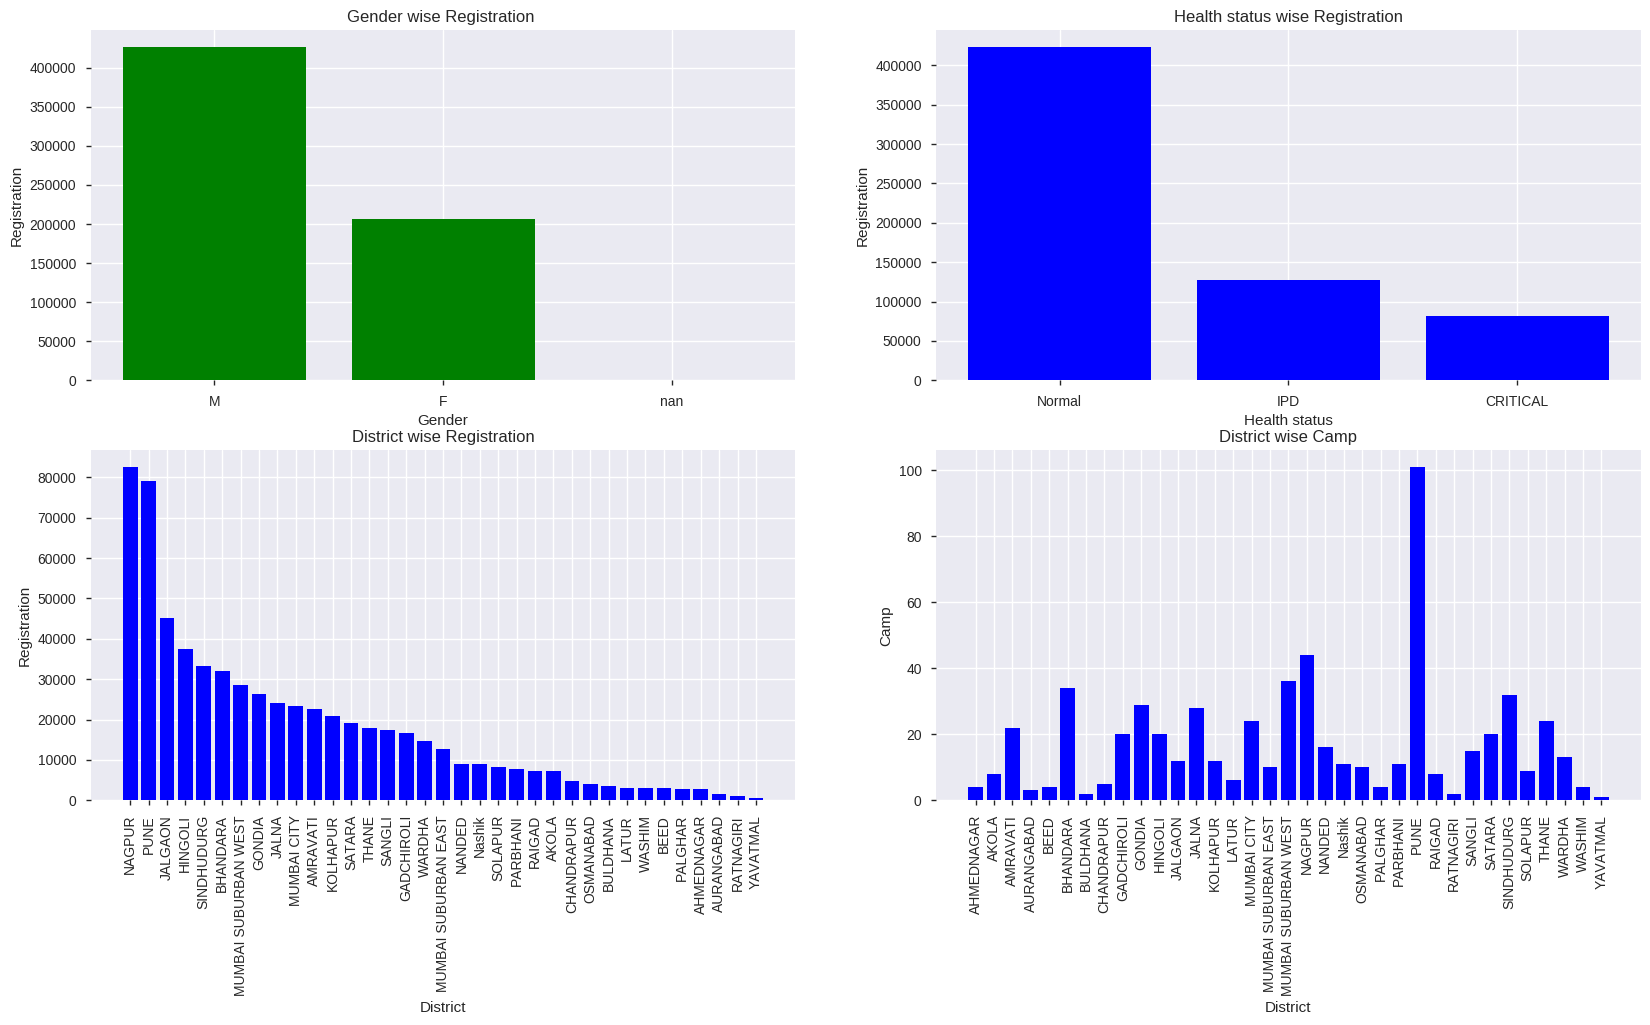

In [30]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
plt.rcParams['figure.figsize'] =[20,10]


fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


healthhcount = df1['health_status'].value_counts().to_dict()
groupnamecount = df1['gender'].value_counts().to_dict()
distnamecount = df1['distname'].value_counts().to_dict()
distwise_reg = df1.groupby("distname").agg({"camplocation": pd.Series.nunique}).reset_index()


ax1.title.set_text('Gender wise Registration ')
service_value1=groupnamecount.values()
service_keys1=groupnamecount.keys()
ax1.set_xlabel('Gender')
ax1.set_ylabel('Registration')
ax1.bar(service_keys1,service_value1, color = 'green')


ax2.title.set_text('Health status wise Registration')
service_value1=healthhcount.values()
service_keys1=healthhcount.keys()
ax2.set_xlabel('Health status')
ax2.set_ylabel('Registration')
ax2.bar(service_keys1,service_value1, color = 'blue')



ax3.title.set_text('District wise Registration')
distnamecount_value1=distnamecount.values()
distnamecount_keys1=distnamecount.keys()
ax3.set_xlabel('District')
ax3.set_ylabel('Registration')
ax3.bar(distnamecount_keys1,distnamecount_value1, color = 'blue')
for tick in ax3.get_xticklabels():
    tick.set_rotation(90)


ax4.title.set_text('District wise Camp')
distnamecount_value1=distwise_reg['camplocation']
distnamecount_keys1=distwise_reg['distname']
ax4.set_xlabel('District')
ax4.set_ylabel('Camp')
ax4.bar(distnamecount_keys1,distnamecount_value1, color = 'blue')
for tick in ax4.get_xticklabels():
    tick.set_rotation(90)


**District wise Registration Count**

In [31]:
import pandas as pd
distwise_reg = df1.groupby("distname").agg({"regdid": pd.Series.nunique})
distwise_reg.sort_values(by=['regdid'])


,regdid
distname,
YAVATMAL,64
RATNAGIRI,113
AURANGABAD,161
AHMEDNAGAR,275
PALGHAR,277
BEED,310
WASHIM,311
LATUR,312
BULDHANA,369


**District wise maximum Registration Count**

In [32]:
distwise_reg[distwise_reg.regdid == distwise_reg.regdid.max()]

,regdid
distname,
NAGPUR,8190


**District wise minimum Registration Count**

In [33]:
distwise_reg[distwise_reg.regdid == distwise_reg.regdid.min()]


,regdid
distname,
YAVATMAL,64


***Gender wise Worker Patient***

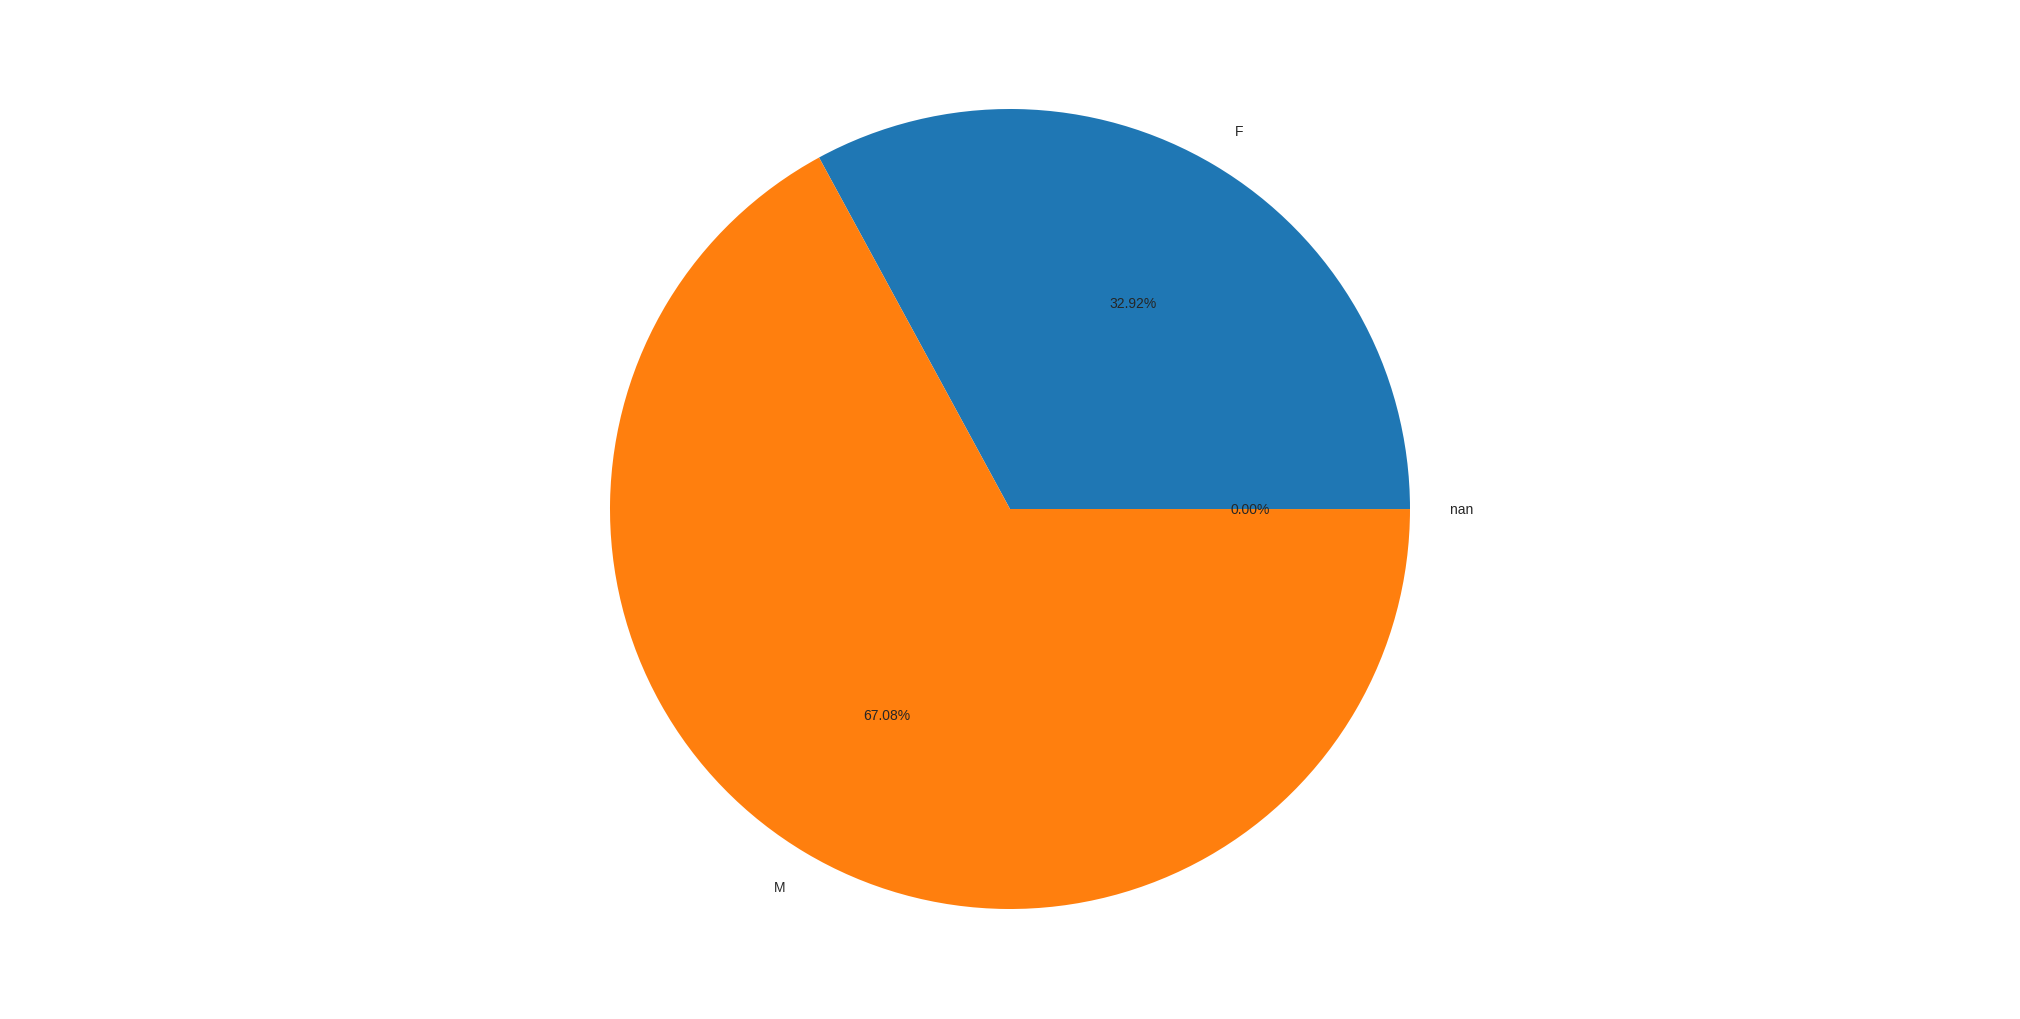

In [34]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
distwise_reg = df1.groupby("gender").agg({"regdid": pd.Series.nunique}).reset_index()
distname =list(distwise_reg['gender'])
distregdid =list(distwise_reg['regdid'])
ax.pie(distregdid , labels =distname ,autopct='%1.2f%%')
plt.show()

**District wise Gender wise count**

In [35]:
%%html 
<marquee style='width: 100%; color: blue;'><b>District wise Registration Count!</b></marquee>

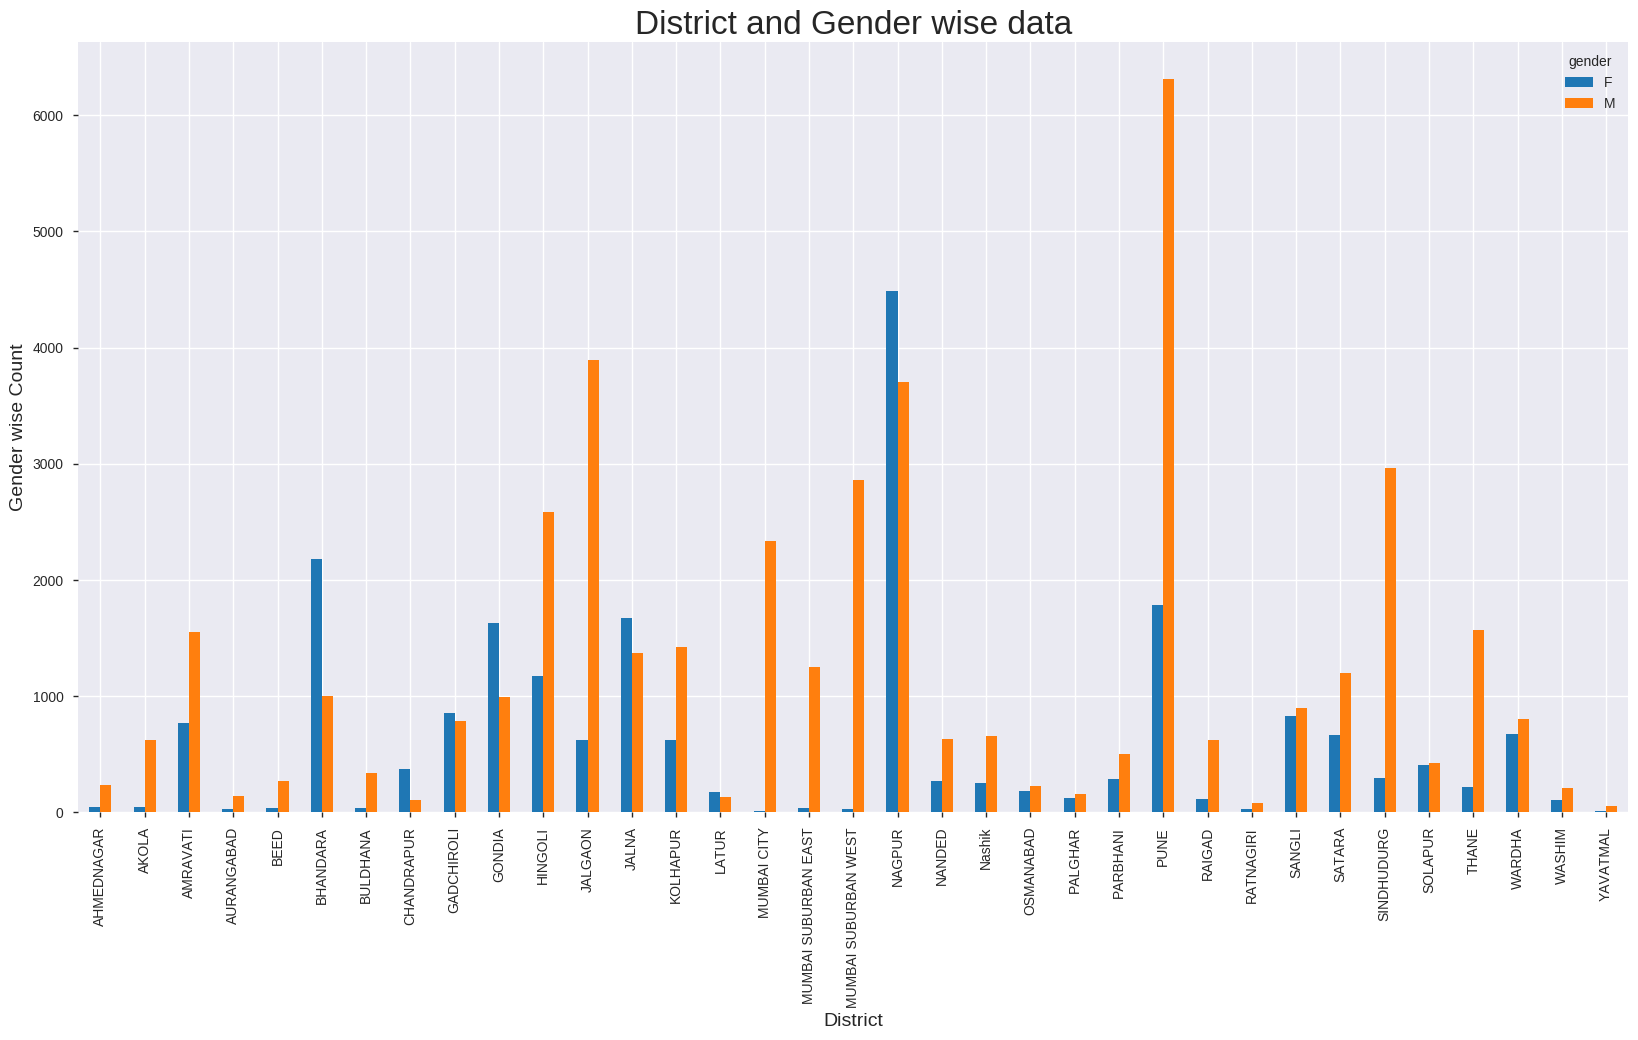

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

distwise_reg = df1.groupby(['gender','distname']).agg({"regdid": pd.Series.nunique}).apply(list)
distwise_reg = distwise_reg.reset_index()
distwise_reg=distwise_reg.sort_values(by=['distname'])
distwise_reg = distwise_reg.pivot_table('regdid', ['distname'], 'gender')
distwise_reg=distwise_reg.reset_index()

plt.rcParams['figure.figsize'] =[20,10]
df = pd.DataFrame(distwise_reg)

df.plot(x="distname", y=['F','M'], kind="bar")
# plt.set_xlabel("District")
# plt.set_ylabel("Gender wise Count")
plt.xticks(rotation=90)
plt.title('District and Gender wise data',fontsize=24)
plt.xlabel('District',fontsize=14)
plt.ylabel('Gender wise Count',fontsize=14)
plt.show()

**Age wise Registration Count**

In [37]:
import pandas as pd
distwise_reg = df1.groupby("age").agg({"regdid": pd.Series.nunique})
agewisereg=distwise_reg.sort_values(by=['regdid'])
print(str('Age').ljust(50), 'Age wise count')
print('------------------------------------------------------------------')
agewisereg=agewisereg.sort_values(by=['age'])
for index1, row in agewisereg.iterrows():
    print(str(int(index1)).ljust(50), str(row['regdid']))

Age                                                Age wise count
------------------------------------------------------------------
0                                                  108
2                                                  1
18                                                 166
19                                                 528
20                                                 797
21                                                 1009
22                                                 1136
23                                                 1239
24                                                 1563
25                                                 1919
26                                                 1580
27                                                 1675
28                                                 1939
29                                                 1934
30                                                 3272
31                                

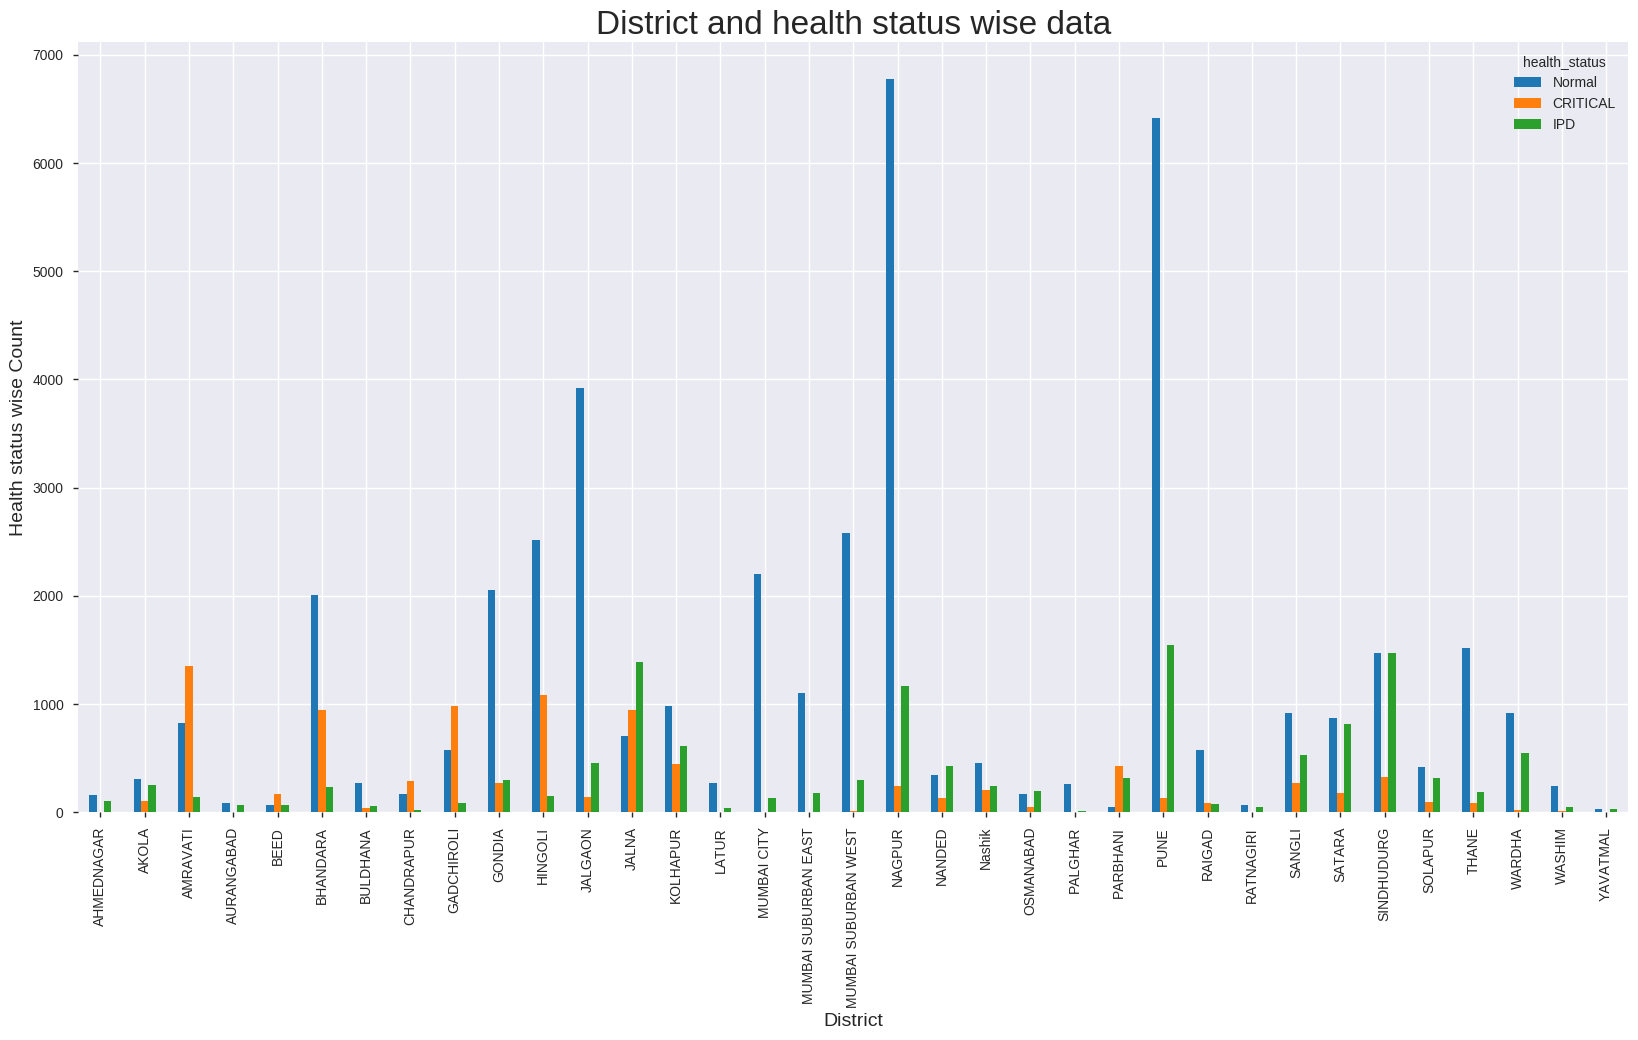

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

distwise_reg = df1.groupby(['health_status','distname']).agg({"regdid": pd.Series.nunique}).apply(list)
distwise_reg = distwise_reg.reset_index()
distwise_reg=distwise_reg.sort_values(by=['distname'])
distwise_reg = distwise_reg.pivot_table('regdid', ['distname'], 'health_status')
distwise_reg=distwise_reg.reset_index()

plt.rcParams['figure.figsize'] =[20,10]
df = pd.DataFrame(distwise_reg)

df.plot(x="distname", y=['Normal','CRITICAL','IPD'], kind="bar")
plt.xticks(rotation=90)
plt.title('District and health status wise data',fontsize=24)
plt.xlabel('District',fontsize=14)
plt.ylabel('Health status wise Count',fontsize=14)
plt.show()

In [39]:
df1.head()

,campid,campno,camplocation,campdate,distlgdcode,distname,regdid,regdno,fullname,mobile,age,gender,docremark,health_status,bmi,weight_kgs,height_cms,bloodsugar_f,bloodsugar_pp,bloodsugar_r,pulserate,testid,testname,right_remark,left_remark,testname_lft,fev1,fevi_fvc,pef,fef_25_75,fivc,pif,fet,result,diseaseid,diseasename,disease_status,campdate_ph,distlgdcode_ph,isalcohol,issmoking,istobaco,isdrug,phy_exam_testid,phy_exam_testname,phy_exam_remark,testid_vi,testname_vi,diesease_injury_evidence_right_vi,diesease_injury_evidence_left_vi,other_remark_vi,suggestion_vi,finalremark_vi,wearingglasses_vi,leftremark_vi,rightremark_vi,nearvisionremark_vi
0,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497742,131380003406,Manisha Suhas Nikam,9967911264.0,35.0,F,patient is normal,Normal,22.3674,51.0,151.0,117.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,2.552,0.852,3.285,2034.013,2.557,3.364,0.027,NORMAL,7.0,Tuberculosis,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,No,Normal Vision,Normal Vision,Normal Vision
1,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497742,131380003406,Manisha Suhas Nikam,9967911264.0,35.0,F,patient is normal,Normal,22.3674,51.0,151.0,117.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,2.552,0.852,3.285,2034.013,2.557,3.364,0.027,NORMAL,8.0,Cardiovascular Diseasse,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,No,Normal Vision,Normal Vision,Normal Vision
2,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497742,131380003406,Manisha Suhas Nikam,9967911264.0,35.0,F,patient is normal,Normal,22.3674,51.0,151.0,117.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,2.552,0.852,3.285,2034.013,2.557,3.364,0.027,NORMAL,9.0,Congenital Abnormality,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,No,Normal Vision,Normal Vision,Normal Vision
3,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497744,131390043378,Amruta Sambhaji Shingate,9923966540.0,29.0,F,patient is normal,Normal,24.3865,64.0,162.0,120.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,3.028,0.926,25.185,2493.410,2.225,3.244,0.022,NORMAL,1.0,Asthama,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,Yes,Normal Vision,Normal Vision,Normal Vision
4,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497744,131390043378,Amruta Sambhaji Shingate,9923966540.0,29.0,F,patient is normal,Normal,24.3865,64.0,162.0,120.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,3.028,0.926,25.185,2493.410,2.225,3.244,0.022,NORMAL,10.0,Gastrointestinal Ulcer,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,Yes,Normal Vision,Normal Vision,Normal Vision


In [40]:
import pandas as pd

print(str('Dist').ljust(50), 'Camp Location')
print('------------------------------------------------------------------')

param=df1.distname.unique()
District = '3rd option' #@param ["AHMEDNAGAR", "2nd option", "3rd option"]

param
# print(District)


# distcomploccount=df1.groupby(['distname','camplocation','campdate'])['regdid'].count().reset_index()
# for index1,row  in distcomploccount.iterrows():
#     print(str(row['distname']).ljust(25),str(row['camplocation']).ljust(125), str(row['campdate']).ljust(25),str(row['regdid']))



Dist                                               Camp Location
------------------------------------------------------------------


array(['SANGLI', 'NAGPUR', 'JALGAON', 'RATNAGIRI', 'MUMBAI CITY',
       'SINDHUDURG', 'PUNE', 'AURANGABAD', 'RAIGAD', 'WARDHA', 'THANE',
       'BEED', 'AKOLA', 'KOLHAPUR', 'LATUR', 'HINGOLI', 'OSMANABAD',
       'JALNA', 'NANDED', 'BHANDARA', 'SOLAPUR', 'BULDHANA', 'WASHIM',
       'GONDIA', 'PARBHANI', 'AMRAVATI', 'YAVATMAL', 'GADCHIROLI',
       'PALGHAR', 'SATARA', 'AHMEDNAGAR', 'MUMBAI SUBURBAN WEST',
       'Nashik', 'MUMBAI SUBURBAN EAST', 'CHANDRAPUR'], dtype=object)

In [0]:
df1.shape

(632948, 62)

In [41]:
!pip install pandas-profiling
import pandas_profiling
profile = pandas_profiling.ProfileReport(df1)
#

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [42]:
profile

Number of variables,58
Number of observations,632795
Total Missing (%),10.8%
Total size in memory,280.0 MiB
Average record size in memory,464.0 B
Numeric,18
Categorical,35
Boolean,2
Date,0
Text (Unique),0
Rejected,3
